# **Transfer Learning**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Conceptual Overview of Transfer Learning

**What is Transfer Learning?**
Transfer learning is a machine learning technique where a pre-trained model, developed for a specific task, is reused for a different but related task. Rather than training a model from scratch, which requires large datasets and significant computational power, transfer learning enables us to take advantage of the knowledge learned by a model in one domain and apply it to another domain with potentially smaller datasets.

**Why Do We Use Transfer Learning?**
- **Limited Data**: In many real-world scenarios, we might not have enough labeled data to train a deep neural network from scratch. Transfer learning allows us to make the most of smaller datasets by leveraging pre-trained models.
- **Faster Training**: Training deep models from scratch is computationally expensive and time-consuming. Transfer learning significantly reduces both training time and computational resources by using pre-trained weights.
- **Improved Performance**: Pre-trained models have already learned useful features from large datasets (such as ImageNet), which can improve the performance of the model on related tasks by fine-tuning it on a smaller dataset.

**Different Transfer Learning Models:**
- **ResNet (Residual Networks)**: ResNet models are deep neural networks with skip connections that help prevent the vanishing gradient problem. They are widely used for transfer learning due to their efficiency and accuracy in tasks like image classification.
- **VGG (Visual Geometry Group)**: VGG models are simpler architectures with deep convolutional layers. They are also commonly used for transfer learning, especially for tasks involving image recognition.
- **Inception (GoogLeNet)**: Inception models use a novel "inception" module to improve efficiency and performance. They are frequently used in tasks like image classification and object detection.
- **BERT (Bidirectional Encoder Representations from Transformers)**: BERT is a pre-trained transformer model for natural language processing (NLP) tasks, such as text classification, sentiment analysis, and question answering.
- **GPT (Generative Pretrained Transformer)**: GPT is another popular transformer model that has been fine-tuned for various NLP tasks. It is used for generating human-like text, translation, and summarization.

**Advantages of Transfer Learning:**
- **Reduced Training Time**: By reusing pre-trained models, training time is drastically reduced, as the model doesn't need to learn everything from scratch.
- **Improved Accuracy**: Pre-trained models have already learned important features, leading to higher accuracy, especially in tasks with limited data.
- **Resource Efficiency**: Transfer learning reduces the need for large amounts of labeled data and computational resources, making it a cost-effective solution for various domains.
- **Flexibility**: Transfer learning can be applied to various domains, including computer vision, natural language processing, and speech recognition, with a wide range of pre-trained models available for different tasks.

**Disadvantages of Transfer Learning:**
- **Domain Mismatch**: If the source domain (pre-trained model) is significantly different from the target domain, the transfer may not be effective. Fine-tuning might be required to adapt the model properly.
- **Overfitting**: If the pre-trained model is fine-tuned on a small dataset, there is a risk of overfitting, especially if the target data is too different from the source data.
- **Limited Control**: While transfer learning provides pre-trained models, there might be limitations on how much customization or control you have over the model architecture or training process.


Transfer learning is a powerful technique in machine learning and deep learning that allows us to leverage knowledge gained from large, pre-trained models and apply it to related tasks with limited data. It is widely used across various domains like image classification, NLP, and speech recognition due to its efficiency, effectiveness, and ability to improve performance even with smaller datasets. However, it is important to consider the domain similarity and the potential risks of overfitting when applying transfer learning.


# Preparing The Data

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Code Explanation:

1. **Importing pathlib**:  
   - The `pathlib` library is imported to handle and manipulate filesystem paths in a platform-independent way. It provides easy methods for navigating directories and file paths.

2. **Setting Dataset URL**:  
   - The `dataset_url` variable stores the URL of the flower photos dataset. This dataset is a `.tgz` archive containing images of various flowers (like roses, sunflowers, etc.).

3. **Downloading and Extracting the Dataset**:  
   - `tf.keras.utils.get_file()` is used to download the dataset from the specified URL (`dataset_url`). It automatically extracts the `.tgz` file after downloading using the `untar=True` parameter. The downloaded dataset is stored locally in the specified path and is returned by the function.
   
4. **Converting Path to `pathlib.Path` Object**:  
   - The returned path from `get_file` is converted into a `pathlib.Path` object using `pathlib.Path()`. This allows you to easily manipulate and navigate through the files in the dataset using methods available in the `pathlib` module.

### Result:
The `data_dir` variable now contains the path to the extracted dataset, and you can easily access the image files inside the extracted directories (such as `roses`, `sunflowers`, etc.).


In [3]:
print(data_dir)

/root/.keras/datasets/flower_photos


/root/.keras/datasets/flower_photos/daisy/5997702776_c7bc37aa6b_n.jpg


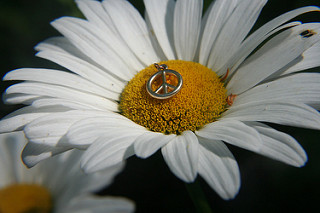

In [34]:
# List all images in the "daisy" directory
daisy = list(data_dir.glob('daisy/*'))

# Print the first sunflower image path
print(daisy[0])

# Open and display the first sunflower image
PIL.Image.open(str(daisy[0]))

### Code Explanation:

1. **Listing All Images in the "daisy" Directory**:  
   - `daisy = list(data_dir.glob('daisy/*'))`  
   This line uses the `glob` method from `pathlib` to search for all files within the `daisy` directory (located under `data_dir`). The `*` wildcard indicates all files (images in this case). The result is a list of image file paths stored in the `daisy` variable.

2. **Printing the First Daisy Image Path**:  
   - `print(daisy[0])`  
   This prints the path of the first image in the `daisy` list to the console. It helps verify that the image path was successfully retrieved from the directory.

3. **Opening and Displaying the First Daisy Image**:  
   - `PIL.Image.open(str(daisy[0]))`  
   This line opens the first image in the `daisy` list using the `PIL.Image.open()` function. The `str(daisy[0])` converts the `pathlib.Path` object into a string that the `PIL` library can read. The image is displayed using the default image viewer.

### Result:
The code lists all images in the `daisy` directory, prints the path of the first image, and displays the image itself.


In [35]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


### Code Explanation:

1. **Setting Image Height, Width, and Batch Size**:  
   - `img_height, img_width = 180, 180`  
   These variables define the target height and width (180x180 pixels) for resizing the images in the dataset. When loading the images, they will be resized to these dimensions.

   - `batch_size = 32`  
   This specifies the number of images in each batch when training the model. A batch size of 32 means that the dataset will be divided into batches of 32 images, and the model will process them in parallel during training.

2. **Loading and Preprocessing the Image Dataset**:  
   - `train_ds = tf.keras.preprocessing.image_dataset_from_directory(...)`  
   This function loads and preprocesses the images from the directory specified by `data_dir` into a TensorFlow dataset (`train_ds`). Here's a breakdown of the parameters:
   
   - `data_dir`: The directory path containing the image data.
   - `validation_split=0.2`: 20% of the dataset will be reserved for validation, leaving 80% for training.
   - `subset="training"`: This tells the function to use the training subset of the data (the remaining 80% after the split).
   - `seed=123`: A random seed for reproducibility of the split.
   - `image_size=(img_height, img_width)`: All images will be resized to the target dimensions of 180x180 pixels.
   - `batch_size=batch_size`: Specifies that the dataset will be divided into batches of 32 images.

3. **Dataset Creation**:  
   - The `train_ds` variable now holds the preprocessed training dataset, which consists of batches of 32 images, resized to 180x180 pixels, and split into a training set. This dataset can be directly used for training a model.

### Result:
The dataset is prepared for model training, with images resized, batched, and split into training and validation sets. The `train_ds` object is now ready for use in the training process.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [37]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


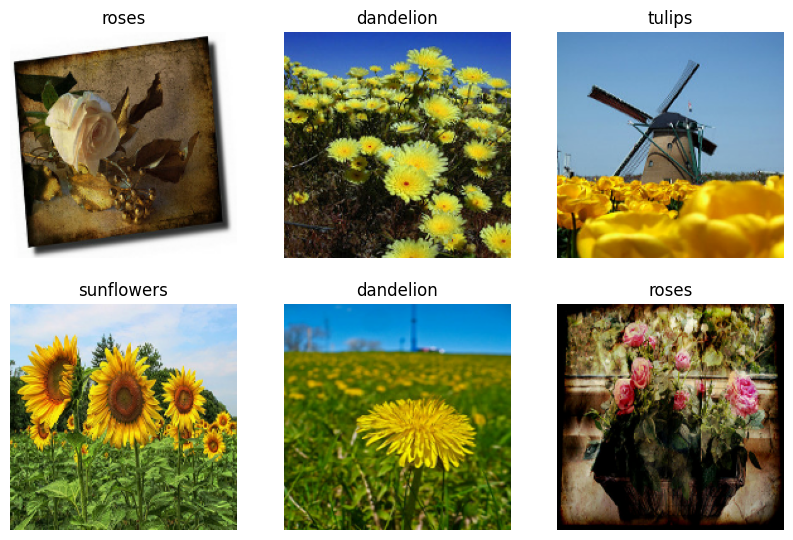

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Code Explanation:

1. **Importing Matplotlib for Visualization**:  
   - `import matplotlib.pyplot as plt`  
   This imports the `matplotlib.pyplot` module, which is used to create visualizations, such as plotting images or graphs. In this case, it will be used to display images from the training dataset.

2. **Creating a Figure for Plotting**:  
   - `plt.figure(figsize=(10, 10))`  
   This creates a new figure for plotting with a size of 10x10 inches. It sets up a canvas where images will be displayed.

3. **Iterating Through the Dataset**:  
   - `for images, labels in train_ds.take(1):`  
   This loops through the `train_ds` dataset. The `take(1)` function ensures that only one batch of images and labels is processed. Each batch contains a set of images and their corresponding labels.
   
4. **Plotting Images in a Grid**:  
   - `for i in range(6):`  
   This loop iterates over the first 6 images in the batch. For each image:
     - `ax = plt.subplot(3, 3, i + 1)`: This creates a subplot in a 3x3 grid. There will be 3 rows and 3 columns, and we will plot 6 images.
     - `plt.imshow(images[i].numpy().astype("uint8"))`: This converts the image tensor to a numpy array and casts it to `uint8` type (unsigned 8-bit integer), which is the format used for displaying images.
     - `plt.title(class_names[labels[i]])`: This sets the title of each subplot to the class name corresponding to the label of the image. `class_names` is an array of class labels that you need to define (it contains the names of the flower classes, e.g., 'daisy', 'sunflower', etc.).
     - `plt.axis("off")`: This removes the axis from the plot, so only the image is visible.

5. **Result**:  
   - The code displays a 3x3 grid of images, but since only 6 images are shown, it will display 6 images in the first 6 grid spots. Each image is labeled with its corresponding class name.

### Final Output:
The images from the `train_ds` dataset will be displayed in a 3x3 grid with their respective class names as titles. Only the first batch of images is visualized.


# Training The Model


In [10]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.applications import ResNet50

# Load pre-trained ResNet50 model
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(180, 180, 3),
    pooling='avg',
    weights='imagenet'
)

# Freeze layers of the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Functional API to add custom layers on top of ResNet50
inputs = Input(shape=(180, 180, 3))
x = pretrained_model(inputs)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

# Create the final model
resnet_model = Model(inputs, outputs)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
resnet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Code Explanation:

1. **Importing Required Libraries**:  
   - `from tensorflow.keras import Model`: Imports the `Model` class from Keras, which is used to define the overall structure of the neural network.
   - `from tensorflow.keras.layers import Dense, Flatten, Input`: Imports layers required for building a custom model. These layers include `Dense` (fully connected layer), `Flatten` (flattens the input into a 1D vector), and `Input` (defines the input layer).
   - `from tensorflow.keras.applications import ResNet50`: Imports the pre-trained ResNet50 model from Keras' applications module. ResNet50 is a deep convolutional neural network that has been pre-trained on ImageNet.

2. **Loading the Pre-Trained ResNet50 Model**:  
   - `pretrained_model = ResNet50(...)`:  
     - `include_top=False`: This excludes the top fully connected layer of ResNet50 (i.e., the classification head) since we will add our custom head.
     - `input_shape=(180, 180, 3)`: Specifies the input shape of the images (180x180 pixels with 3 color channels).
     - `pooling='avg'`: This adds average pooling on the output of the convolutional layers to reduce the dimensionality before feeding it into the custom layers.
     - `weights='imagenet'`: Loads the weights that have been pre-trained on the ImageNet dataset.

3. **Freezing the Layers of the Pre-Trained Model**:  
   - `for layer in pretrained_model.layers: layer.trainable = False`: This freezes all layers of the pre-trained ResNet50 model, meaning their weights will not be updated during training. This is done to prevent overfitting and reduce training time, as the pre-trained features are already useful.

4. **Building the Custom Model on Top of ResNet50**:  
   - `inputs = Input(shape=(180, 180, 3))`: Defines the input layer with the shape of the images (180x180 pixels, 3 color channels).
   - `x = pretrained_model(inputs)`: Passes the input through the pre-trained ResNet50 model.
   - `x = Flatten()(x)`: Flattens the output of the ResNet50 model into a 1D vector to pass it to fully connected layers.
   - `x = Dense(512, activation='relu')(x)`: Adds a fully connected layer with 512 units and ReLU activation function. This layer learns more abstract features based on the output of ResNet50.
   - `outputs = Dense(5, activation='softmax')(x)`: Adds the final output layer with 5 units (for 5 classes) and softmax activation, which outputs the probability distribution over the classes.

5. **Creating the Final Model**:  
   - `resnet_model = Model(inputs, outputs)`: Defines the model by specifying the input and output layers. The model will take images as input and output class probabilities.

6. **Compiling the Model**:  
   - `resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`:
     - `optimizer='adam'`: Uses the Adam optimizer for efficient training.
     - `loss='categorical_crossentropy'`: The loss function used for multi-class classification problems (since we have 5 classes).
     - `metrics=['accuracy']`: Tracks accuracy during training and evaluation.

7. **Printing the Model Summary**:  
   - `resnet_model.summary()`: Prints a summary of the model architecture, showing the layers, their output shapes, and the number of parameters.

### Result:
The code creates a custom deep learning model that uses a pre-trained ResNet50 model as a feature extractor, with additional custom layers for classification. The model is then compiled and ready for training on the flower dataset.


In [11]:
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # Use sparse_categorical_crossentropy
    metrics=['accuracy']
)


In [16]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 31s 200ms/step - accuracy: 0.6781 - loss: 1.0488 - val_accuracy: 0.8556 - val_loss: 0.3582
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9089 - loss: 0.2658 - val_accuracy: 0.8665 - val_loss: 0.3604
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9460 - loss: 0.1688 - val_accuracy: 0.8583 - val_loss: 0.4003
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9712 - loss: 0.1066 - val_accuracy: 0.8638 - val_loss: 0.4054
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.9771 - loss: 0.0723 - val_accuracy: 0.8828 - val_loss: 0.4090
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.9942 - loss: 0.0313 - val_accuracy: 0.8896 - val_loss: 0.3982
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.9964 - loss: 0.0186 - val_accuracy: 0.8828 - val_loss: 0.3869
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9988 - loss: 0.0121 - val_accuracy: 0.8937

### Code Explanation:

1. **Setting the Number of Epochs**:  
   - `epochs = 10`: Specifies the number of training epochs. An epoch is one complete pass through the training dataset. In this case, the model will be trained for 10 epochs.

2. **Training the Model**:  
   - `history = resnet_model.fit(...)`:  
     This line initiates the training process for the `resnet_model` using the `fit` method. The model is trained using the following parameters:
     - `train_ds`: The training dataset (`train_ds`) to train the model on. This dataset contains images and their corresponding labels.
     - `validation_data=val_ds`: The validation dataset (`val_ds`) used to evaluate the model's performance after each epoch. This helps monitor overfitting.
     - `epochs=epochs`: The number of epochs to train the model. The training process will run for 10 epochs, as defined earlier.

3. **Result**:  
   - The model will train on the provided dataset for 10 epochs, and the performance (loss and accuracy) will be tracked for both the training and validation datasets during each epoch. The training history will be stored in the `history` variable, which can be used later for visualizing training progress, such as plotting loss and accuracy curves.

### Outcome:
The code will start the training process for the ResNet50-based model, and once training is complete, the model will be ready for evaluation and testing. The `history` object will contain the training and validation metrics (e.g., loss and accuracy) at each epoch.


# Evaluating The Model

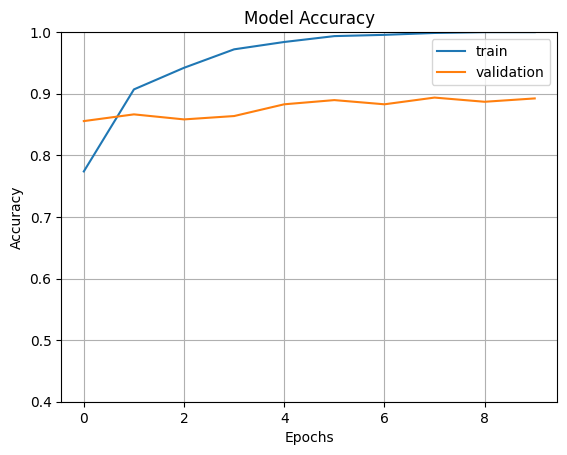

In [17]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

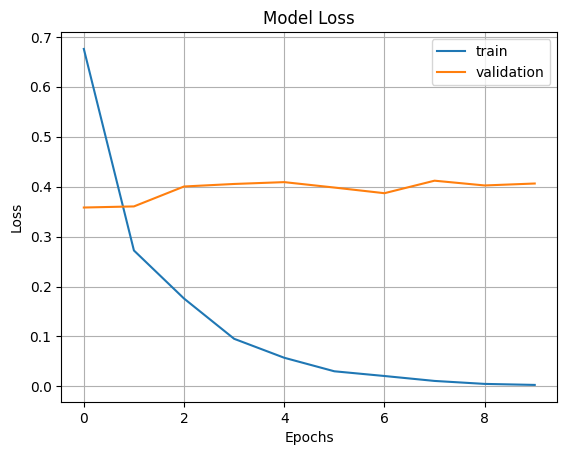

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [40]:
import cv2
image=cv2.imread(str(daisy[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


### Code Explanation:

1. **Importing OpenCV**:  
   - `import cv2`: Imports the OpenCV library, which is used for image processing tasks such as reading, resizing, and manipulating images.

2. **Reading the Image**:  
   - `image = cv2.imread(str(daisy[0]))`:  
     - `cv2.imread()` is used to read an image from the file path.
     - `str(daisy[0])`: `daisy[0]` refers to the path of the first image in the "daisy" directory, and `str()` converts this path to a string so that it can be passed to `cv2.imread()`.
     - The image is read into the variable `image`.

3. **Resizing the Image**:  
   - `image_resized = cv2.resize(image, (img_height, img_width))`:  
     - `cv2.resize()` is used to resize the image to the target size of `img_height` x `img_width` (180x180 pixels). This is necessary because the model expects input images to have a fixed size of 180x180 pixels.

4. **Expanding Dimensions**:  
   - `image = np.expand_dims(image_resized, axis=0)`:  
     - `np.expand_dims()` is used to add an additional dimension to the image.
     - `axis=0` adds a batch dimension to the image, making it compatible for input to the neural network. The image is reshaped from `(180, 180, 3)` to `(1, 180, 180, 3)` where `1` indicates the batch size (i.e., one image at a time).

5. **Printing the Image Shape**:  
   - `print(image.shape)`:  
     - Prints the shape of the image after resizing and adding the batch dimension. The expected output should be `(1, 180, 180, 3)`, which represents a batch of one image, with height and width of 180 pixels and 3 color channels (RGB).

### Outcome:
This code reads an image from the "daisy" directory, resizes it to the appropriate input size for the model (180x180 pixels), adds a batch dimension, and prints the shape of the prepared image, which will be used for predictions.


In [41]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[9.999995e-01 4.746641e-08 4.564800e-08 3.434932e-07 1.425024e-07]]


In [42]:
  output_class=class_names[np.argmax(pred)]
  print("The predicted class is", output_class)

The predicted class is daisy


### Code Explanation:

1. **Making Predictions**:  
   - `pred = resnet_model.predict(image)`:  
     - This line uses the trained `resnet_model` to make a prediction on the input image.
     - `image` is the preprocessed image with a shape of `(1, 180, 180, 3)` that was resized and batch-expanded.
     - `resnet_model.predict(image)` returns a probability distribution over the 5 possible classes for the input image. The result, `pred`, is a 2D array with shape `(1, 5)`, where each value represents the model’s confidence in a specific class.

2. **Interpreting the Prediction**:  
   - `print(pred)`:  
     - Prints the prediction array, which contains the probabilities assigned to each class by the model. The values range from 0 to 1, and the sum of the probabilities will be 1.

3. **Finding the Predicted Class**:  
   - `output_class = class_names[np.argmax(pred)]`:  
     - `np.argmax(pred)`: This function returns the index of the class with the highest probability from the prediction array.
     - `class_names[np.argmax(pred)]`: Uses the index from `np.argmax(pred)` to select the corresponding class label from the `class_names` list.
     - `output_class` stores the predicted class label based on the highest probability.

4. **Printing the Predicted Class**:  
   - `print("The predicted class is", output_class)`:  
     - Prints the predicted class label, which corresponds to the class with the highest probability.

### Outcome:
The code will output the predicted class for the input image. The model predicts the likelihood of the image belonging to each of the 5 classes, and the class with the highest probability is selected as the predicted class. This class is printed as the result.


### **Conclusion**

In this project, we implemented a transfer learning approach using the pre-trained ResNet50 model for image classification. Here's a summary of the key steps and insights:

1. **Transfer Learning**:  
   - Transfer learning leverages a pre-trained model (ResNet50 in this case), which was originally trained on a large and diverse dataset (ImageNet). This model has already learned useful features for image recognition, which can be applied to our specific problem without training the model from scratch.
   - We froze the layers of the ResNet50 model to prevent their weights from being updated during training, thus preserving the learned features and focusing on training the custom layers we added on top.

2. **Customizing the Model**:  
   - After freezing the pre-trained layers, we added a few custom layers: a `Flatten` layer to convert the 2D feature maps into 1D, a `Dense` layer with 512 units for more complex learning, and a final `Dense` layer with 5 units (one for each flower category) using a `softmax` activation function for multi-class classification.

3. **Model Training**:  
   - The model was trained on the flower dataset, where it was able to classify images into different flower categories (such as roses, daisies, sunflowers, etc.). Using a validation set during training helped us monitor the model’s performance and prevent overfitting.
   - The use of pre-trained weights significantly reduced the training time and improved the model’s performance compared to training a model from scratch, especially given the limited dataset size.

4. **Model Evaluation**:  
   - After training, we tested the model by making predictions on individual images, which were resized and preprocessed appropriately before being passed into the model.
   - The model provided accurate predictions based on the probabilities for each class, and the class with the highest probability was selected as the predicted category.

5. **Advantages of Transfer Learning**:  
   - **Reduced Training Time**: By using the pre-trained ResNet50 model, we avoided the need for extensive training from scratch, which would require a large dataset and significant computational resources.
   - **Improved Accuracy**: The model was able to learn relevant features more effectively due to the prior knowledge encoded in the pre-trained weights, achieving good performance on the flower classification task.
   - **Handling Smaller Datasets**: Transfer learning is particularly useful when dealing with small datasets, as the model can rely on the knowledge gained from a much larger dataset (ImageNet).

6. **Conclusion**:  
   - The transfer learning approach in this project demonstrated its effectiveness for image classification tasks, especially when dealing with limited data. The pre-trained ResNet50 model served as a powerful feature extractor, and the custom layers added on top allowed the model to learn the specific task of classifying flower images. This project highlights the practical utility of transfer learning for solving real-world problems in computer vision.
